# Exploring the Data

In [1]:
import numpy as np
from time import time
from IPython.display import display # Allows the use of display() for DataFrames
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder
import matplotlib as mpl  
from sklearn.metrics import classification_report, confusion_matrix,  accuracy_score, precision_score, recall_score, f1_score


# Pretty display for notebooks
%matplotlib inline



In [3]:
data = pd.read_csv("../docs/resources/transactional-sample.csv") 


## Understand the data

In [4]:
data.describe

<bound method NDFrame.describe of       transaction_id  merchant_id  user_id       card_number  \
0           21320398        29744    97051  434505******9116   
1           21320399        92895     2708  444456******4210   
2           21320400        47759    14777  425850******7024   
3           21320401        68657    69758  464296******3991   
4           21320402        54075    64367  650487******6116   
...              ...          ...      ...               ...   
3194        21323592        50493    49581  650486******4139   
3195        21323593         9603    59275  528052******3611   
3196        21323594        57997    84486  522688******9874   
3197        21323595        35930        7  544315******7773   
3198        21323596        17348        8  650487******9884   

                transaction_date  transaction_amount  device_id  has_cbk  
0     2019-12-01T23:16:32.812632              374.56   285475.0    False  
1     2019-12-01T22:45:37.873639              7

In [5]:
data.head(100)

,transaction_id,merchant_id,user_id,card_number,transaction_date,transaction_amount,device_id,has_cbk
0,21320398,29744,97051,434505******9116,2019-12-01T23:16:32.812632,374.56,285475.0,False
1,21320399,92895,2708,444456******4210,2019-12-01T22:45:37.873639,734.87,497105.0,True
2,21320400,47759,14777,425850******7024,2019-12-01T22:22:43.021495,760.36,NaN,False
3,21320401,68657,69758,464296******3991,2019-12-01T21:59:19.797129,2556.13,NaN,True
4,21320402,54075,64367,650487******6116,2019-12-01T21:30:53.347051,55.36,860232.0,False
...,...,...,...,...,...,...,...,...
95,21320493,26502,31255,516292******2696,2019-12-01T14:10:50.581221,65.34,317848.0,False
96,21320494,28172,40779,520132******7705,2019-12-01T14:06:58.203861,3076.06,571604.0,False
97,21320495,61111,20841,550209******6950,2019-12-01T14:05:27.126733,207.94,NaN,False
98,21320496,87936,28428,458919******3227,2019-12-01T14:03:31.205173,77.94,958754.0,False


## 3. Preprocess Data:

Handle missing values (e.g., impute or remove).

Encode categorical features (e.g., card_number, has_cbk).

Convert datetime objects to numerical features (year month day hour min).

In [6]:
import datetime

def extract_numerical_parts(string_value):
    try:
        return int(string_value[:6] + string_value[-2:])
        
    except ValueError:
        return -1
    
def format_datetime(string_date):
    dt = pd.to_datetime(string_date)
    formated = datetime.datetime.strftime(dt, "%Y%m%d%H%M")
    return pd.to_numeric(formated)

def prepare_data(data):
    data.fillna(value=-1, inplace=True) 
    data["has_cbk"] = data["has_cbk"].astype(float)  
    data["transaction_date_code"] = data["transaction_date"].apply(format_datetime)
    data["card_number_code"] = data["card_number"].apply(extract_numerical_parts)
    cleaned_df = data.copy()
    data = data.drop(columns=['card_number', 'transaction_date', 'transaction_id'])
    return data

data = prepare_data(data)
data.head(10)

,merchant_id,user_id,transaction_amount,device_id,has_cbk,transaction_date_code,card_number_code
0,29744,97051,374.56,285475.0,0.0,201912012316,43450516
1,92895,2708,734.87,497105.0,1.0,201912012245,44445610
2,47759,14777,760.36,-1.0,0.0,201912012222,42585024
3,68657,69758,2556.13,-1.0,1.0,201912012159,46429691
4,54075,64367,55.36,860232.0,0.0,201912012130,65048716
5,59566,40759,60.49,192705.0,0.0,201912012125,51629220
6,20917,25661,318.37,760932.0,0.0,201912012125,65048510
7,56107,81152,188.68,486.0,1.0,201912012124,65051601
8,56107,81152,352.77,486.0,1.0,201912012113,65051601
9,56107,81152,345.68,486.0,1.0,201912012104,65051601


In [7]:
data.dtypes
data.select_dtypes(include='number').head()

,merchant_id,user_id,transaction_amount,device_id,has_cbk,transaction_date_code,card_number_code
0,29744,97051,374.56,285475.0,0.0,201912012316,43450516
1,92895,2708,734.87,497105.0,1.0,201912012245,44445610
2,47759,14777,760.36,-1.0,0.0,201912012222,42585024
3,68657,69758,2556.13,-1.0,1.0,201912012159,46429691
4,54075,64367,55.36,860232.0,0.0,201912012130,65048716


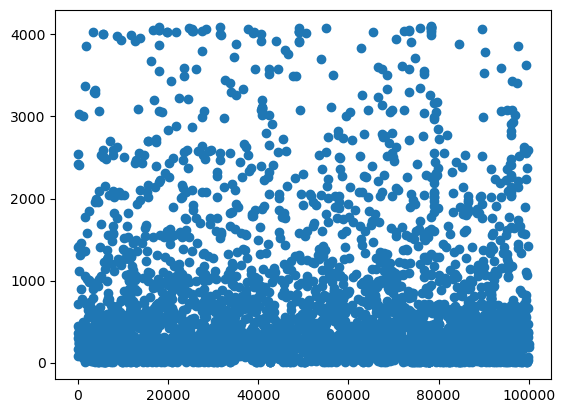

In [8]:
import matplotlib.pyplot as plt
x = data.user_id
y = data.transaction_amount
plt.scatter(x, y)
plt.show()

In [9]:
# Produce a scatter matrix for each pair of features in the data
#pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

In [10]:
# Dividir os dados em recursos (X) e rótulos (y)
X = data.drop('has_cbk', axis=1)
y = data['has_cbk']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar o modelo de floresta aleatória
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Treinar o modelo
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o desempenho do modelo
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[544   6]
 [ 45  45]]
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.96       550
         1.0       0.88      0.50      0.64        90

    accuracy                           0.92       640
   macro avg       0.90      0.74      0.80       640
weighted avg       0.92      0.92      0.91       640



In [12]:
import joblib 

# save model with joblib 
filename = 'model.joblib'
joblib.dump(model, filename)

['model.joblib']

In [148]:
# import seaborn as sns
# # visualize percentiles with heatmap (with default confs)
# sns.heatmap(data.corr())


In [185]:
# from sklearn.model_selection import train_test_split